In [1]:
from matplotlib import pyplot as plt
import numpy as np
from scipy.optimize import minimize,basinhopping
import numpy as np

In [2]:
t_nucleo_exp_inches = 0.11
t_nucleo_exp = t_nucleo_exp_inches * 25.4

Tau_jorge_inches = 0.191
Tau_jorge = Tau_jorge_inches * 25.4

In [3]:
print("Thickness of nucleo expansion board in mm: ", t_nucleo_exp)
print("Thickness of Jorge's Tau board in mm: ", Tau_jorge)

Thickness of nucleo expansion board in mm:  2.794
Thickness of Jorge's Tau board in mm:  4.8514


In [4]:
import pandas as pd

In [5]:

df = pd.read_csv('../experimental.csv', sep='\t')
df.head()

,Nombre,Tensión máxima Tracción [MPa],Alargamiento Tracción [%],Modulo Tracción [MPa],Tensión máxima Flexión [MPa],Módulo flexión [MPa],F/delta,Julios,Ancho,Espesor (mm),Seccion sin entalla (mm),Resiliencia (KJ/m2),Espesor 2(mm)
0,TFP1-1,293.08,11.88,2838.352941,146.7,13329,937,3.4,15.3,4.9,75.0,45.2,5.3
1,TFP1-1,264.43,11.66,2685.491071,145.2,13758,971,4.3,15.2,4.9,74.5,57.5,5.3
2,TFP1-1,279.80,13.46,3132.683658,113.1,12516,838,3.9,15.5,5.0,77.5,50.8,5.2
3,TFP2-1,153.74,9.05,2184.873950,134.9,10753,529,1.8,15.2,4.4,66.9,26.9,4.7
4,TFP2-1,153.51,8.48,2310.839161,113.2,9579,470,2.8,15.5,4.6,71.3,38.6,4.7


In [6]:
df = df[["Nombre","Modulo Tracción [MPa]","Espesor (mm)"," Espesor 2(mm)"]]
# change column names to E[MPa] and t[mm]
df.columns = ['Name', 'E [MPa]', 't1 [mm]', 't2 [mm]']
df["t [mm]"] = 0.5*(df["t1 [mm]"] + df["t2 [mm]"])
df.head()
df = df.drop(columns=["t1 [mm]", "t2 [mm]"])
df["E [GPa]"] = df["E [MPa]"] / 1000
# pop GPa 
df = df.drop(columns=["E [MPa]"])
df

,Name,t [mm],E [GPa]
0,TFP1-1,5.10,2.838353
1,TFP1-1,5.10,2.685491
2,TFP1-1,5.10,3.132684
3,TFP2-1,4.55,2.184874
4,TFP2-1,4.65,2.310839
5,TFP2-1,4.60,2.279795
6,TFP3-1,4.95,2.005195
7,TFP3-1,4.80,1.996418
8,TFP3-1,4.85,1.999697
9,TFP4-1,4.60,2.450986


In [7]:
df_stats = df.groupby('Name').agg(['mean', 'std'])

df_stats.round(2)

t [mm]       E [GPa]      
         mean   std    mean   std
Name                             
TFP1-1   5.10  0.00    2.89  0.23
TFP2-1   4.60  0.05    2.26  0.07
TFP3-1   4.87  0.08    2.00  0.00
TFP4-1   4.60  0.00    2.45  0.11
TFP5-1   5.72  0.06    1.63  0.12
TFP6-1   5.57  0.03    1.74  0.07

In [8]:
composition = [
        ["Y"],
        ["Y", "X"],
        ["Y", "SX"],
        ["Y", "SY"],
        ["Y","SX", "SY"],
        ["Y","X", "SY"]
    ]
df_stats["layers"] = composition

In [9]:
df_stats

t [mm]             E [GPa]                 layers
            mean       std      mean       std             
Name                                                       
TFP1-1  5.100000  0.000000  2.885509  0.227295          [Y]
TFP2-1  4.600000  0.050000  2.258503  0.065626       [Y, X]
TFP3-1  4.866667  0.076376  2.000437  0.004435      [Y, SX]
TFP4-1  4.600000  0.000000  2.451362  0.114353      [Y, SY]
TFP5-1  5.716667  0.057735  1.626582  0.120272  [Y, SX, SY]
TFP6-1  5.566667  0.028868  1.739870  0.067515   [Y, X, SY]

(array([0, 1, 2, 3, 4, 5]),
 [Text(0, 0, 'TFP1-1'),
  Text(1, 0, 'TFP2-1'),
  Text(2, 0, 'TFP3-1'),
  Text(3, 0, 'TFP4-1'),
  Text(4, 0, 'TFP5-1'),
  Text(5, 0, 'TFP6-1')])

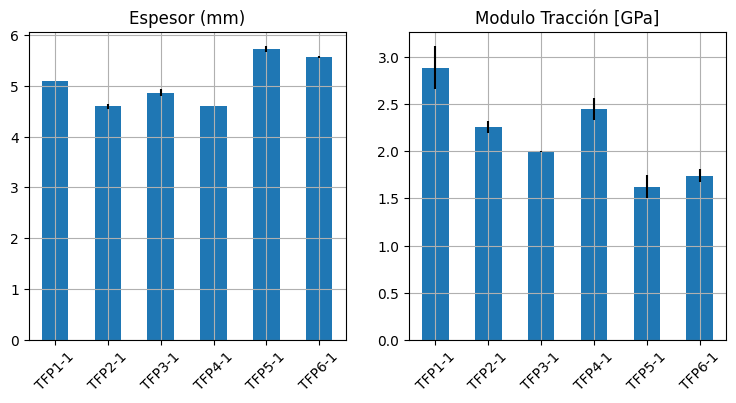

In [10]:
# plot bars with error bars Espesor (mm)
fig = plt.figure(figsize=(9, 4))
ax = fig.add_subplot(121)
df_stats['t [mm]'].plot(kind='bar', y='mean', 
                        yerr='std', 
                        legend=False, 
                        title='Espesor (mm)', 
                        ax=ax)
# ticks angle
plt.xticks(rotation=45)
plt.xlabel('') 

# plot bars with error bars Modulo Tracción [MPa]
plt.grid()
ax = fig.add_subplot(122)
df_stats['E [GPa]'].plot(kind='bar', y='mean', yerr='std', legend=False, title='Modulo Tracción [GPa]', ax=ax)
plt.grid()
# off xlabel
plt.xlabel('') 
plt.xticks(rotation=45)

In [11]:
df_stats

t [mm]             E [GPa]                 layers
            mean       std      mean       std             
Name                                                       
TFP1-1  5.100000  0.000000  2.885509  0.227295          [Y]
TFP2-1  4.600000  0.050000  2.258503  0.065626       [Y, X]
TFP3-1  4.866667  0.076376  2.000437  0.004435      [Y, SX]
TFP4-1  4.600000  0.000000  2.451362  0.114353      [Y, SY]
TFP5-1  5.716667  0.057735  1.626582  0.120272  [Y, SX, SY]
TFP6-1  5.566667  0.028868  1.739870  0.067515   [Y, X, SY]

In [12]:
# [X]       -> [1,0,0,0]
# [X, SX]   -> [1,0,1,0]
# [X, Y]    -> [1,1,0,0]
# [X, SY]       -> [1,0,0,1]
# [X, SX, SY]   -> [1,0,1,1]
# [X, Y, SY]    -> [1,1,0,1]

def get_vector(list_of_layers):
    vector = [0,0,0,0]
    if "X" in list_of_layers:
        vector[0] = 1
    if "SX" in list_of_layers:
        vector[1] = 1
    if "Y" in list_of_layers:
        vector[2] = 1
    if "SY" in list_of_layers:
        vector[3] = 1

    return vector


In [13]:

df_stats['v [X,SX,Y,SY]'] = df_stats['layers'].apply(get_vector)
df_stats["ni"] = df_stats["layers"].apply(len)
df_stats

t [mm]             E [GPa]                 layers v [X,SX,Y,SY] ni
            mean       std      mean       std                              
Name                                                                        
TFP1-1  5.100000  0.000000  2.885509  0.227295          [Y]  [0, 0, 1, 0]  1
TFP2-1  4.600000  0.050000  2.258503  0.065626       [Y, X]  [1, 0, 1, 0]  2
TFP3-1  4.866667  0.076376  2.000437  0.004435      [Y, SX]  [0, 1, 1, 0]  2
TFP4-1  4.600000  0.000000  2.451362  0.114353      [Y, SY]  [0, 0, 1, 1]  2
TFP5-1  5.716667  0.057735  1.626582  0.120272  [Y, SX, SY]  [0, 1, 1, 1]  3
TFP6-1  5.566667  0.028868  1.739870  0.067515   [Y, X, SY]  [1, 0, 1, 1]  3

In [14]:
# only thin 

ni = df_stats["ni"].values
tau_exp = df_stats["t [mm]"]["mean"].values

tau_pred_fcn = lambda tn,tl: tn + 2*tl*ni

In [15]:
from validation.experimental import  nucleo
E_nucleo_exp_Mpa = nucleo()["young modulus [MPa]"]
E_nucleo_exp = E_nucleo_exp_Mpa/1000
print(E_nucleo_exp)

0.8


In [16]:
# min square error


def objective(tn,tl):
    return sum(((tau_pred_fcn(tn,tl) - tau_exp)/tau_exp )**2)

x0 = [0,0]
#
x0 = 2*np.random.rand(2)

bound  = [(0.95*t_nucleo_exp, t_nucleo_exp*1.05), # tn
          (0, None)] # tl


res = minimize(lambda x: objective(*x), x0, method='Nelder-Mead', 
               bounds=bound)

tn_opt = res.x[0]
tl_opt = res.x[1]

tau_pred = tau_pred_fcn(tn_opt,tl_opt)


C:\Users\djoroya\AppData\Local\Temp\ipykernel_14616\4069302859.py:15: OptimizeWarning: Initial guess is not within the specified bounds
  res = minimize(lambda x: objective(*x), x0, method='Nelder-Mead',


In [17]:
print("Optimal tn: ", tn_opt)
print("Optimal tl: ", tl_opt)
print("Residuals: ", res.fun)

Optimal tn:  2.900780458984375
Optimal tl:  0.46292241151183167
Residuals:  0.0655359137584481


In [18]:
# Tau predicted
print("Tau predicted: ", tau_pred)
print("Tau experimental: ", tau_exp)

df_exp = pd.DataFrame({"tau_exp": tau_exp, "tau_pred": tau_pred})
df_exp["error [%]"] = 100*abs(df_exp["tau_exp"] - df_exp["tau_pred"]) / df_exp["tau_exp"]
# round to 2 decimals
df_exp = df_exp.round(2)
df_exp

Tau predicted:  [3.82662528 4.75247011 4.75247011 4.75247011 5.67831493 5.67831493]
Tau experimental:  [5.1        4.6        4.86666667 4.6        5.71666667 5.56666667]


,tau_exp,tau_pred,error [%]
0,5.10,3.83,24.97
1,4.60,4.75,3.31
2,4.87,4.75,2.35
3,4.60,4.75,3.31
4,5.72,5.68,0.67
5,5.57,5.68,2.01


In [19]:
df_stats["layers"][0]

C:\Users\djoroya\AppData\Local\Temp\ipykernel_14616\1222435441.py:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  df_stats["layers"][0]


['Y']

In [20]:

from Composite.CreateLines.BasicLines import BasicLines


lines = {
    "r": 2.5,
    "Nx_sq": 1,
    "Ny_sq": 1,
    "type":  'sin' # 'circle' or 'sin'
}

lines = BasicLines(lines)

C:\Users\djoroya\AppData\Local\Temp\ipykernel_14616\4169359739.py:6: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  for j,layer in enumerate(df_stats['layers'][i]):


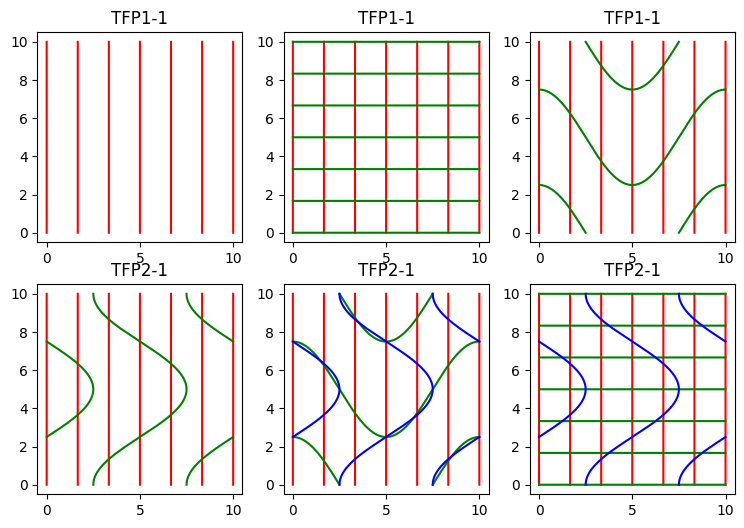

In [21]:
colors = ['r', 'g', 'b', 'c', 'm', 'y', 'k', 'w']
fig = plt.figure(figsize=(9,6))
for i in range(len(df_stats)):
    plt.subplot(2, 3, i+1)

    for j,layer in enumerate(df_stats['layers'][i]):
        for curve in lines["trajs_"+layer]:
            plt.plot(curve[:,0], 
                     curve[:,1],
                     color = colors[j],
                        label = layer) 
    plt.title(df['Name'][i])
    

In [22]:
def E_effective_j(En,Evec,j):
    
    delta_j  = df_stats["v [X,SX,Y,SY]"].iloc[j]
    tau_j    = tau_pred[j]

    return (En*tn_opt + tl_opt*(np.dot(delta_j,Evec)))/tau_j

def E_effective(En,Evec):
    return np.array([E_effective_j(En,Evec,j) for j in range(len(df_stats))])


In [23]:
E_eff_exp = df_stats["E [GPa]"]["mean"].values

Evec_0 = np.array([1,0,0,0])
En_0 = 1000

E_eff_pred = E_effective(En_0,Evec_0)

In [24]:
from validation.experimental import  nucleo
E_nucleo_exp_Mpa = nucleo()["young modulus [MPa]"]
E_nucleo_exp = E_nucleo_exp_Mpa/1000
print(E_nucleo_exp)

0.8


In [25]:
# minimize 
def objective_E(En,Evec):
    return sum((E_effective(En,Evec) - E_eff_exp)**2)

x0 = np.random.rand(5)
# must be positive 
# v [X,SX,Y,SY]
bounds = [  (E_nucleo_exp*0.9,1.1*E_nucleo_exp), # En
            (0.0,None), # Evec[0]   # X
            (0.0,None), # Evec[1]   # SX
            (0.0,None), # Evec[2]   # Y
            (0.0,None), # Evec[3]   # SY
            ]

minimize_kwargs = {
    'method':'Nelder-Mead',
    'bounds': bounds
}

res = basinhopping(lambda x: objective_E(x[0],x[1:]),
                x0, 
                minimizer_kwargs=minimize_kwargs,
                niter=50)


En_opt = res.x[0]
Evec_opt = res.x[1:]


E_eff_pred = E_effective(En_opt,Evec_opt)

c:\Users\djoroya\Documents\GitHub\CITISENS_Composite\.conda\Lib\site-packages\scipy\optimize\_basinhopping.py:302: OptimizeWarning: Initial guess is not within the specified bounds
  return self.minimizer(self.func, x0, **self.kwargs)


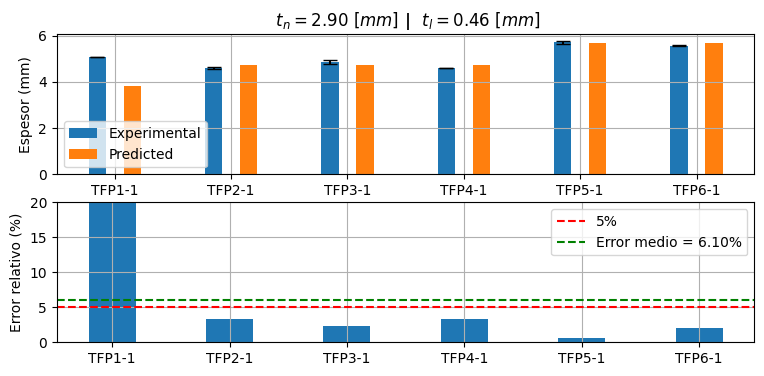

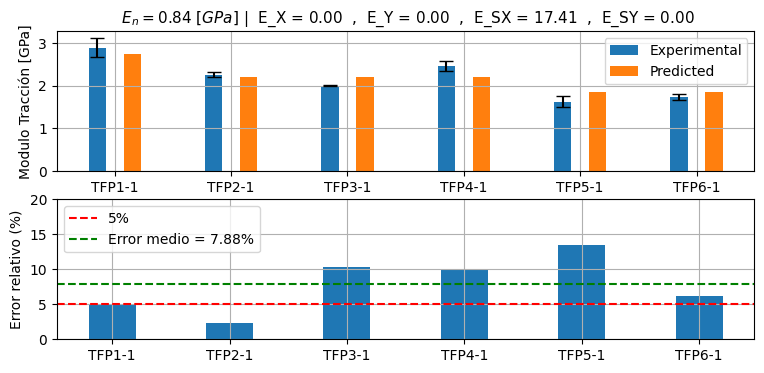

In [26]:
from AnalyticalLayers.plot_E import plot_E
from AnalyticalLayers.plt_thin import plt_thin

plt_thin(df_stats, tau_exp, tau_pred, tn_opt, tl_opt)
plot_E(df_stats, E_eff_exp, E_eff_pred, Evec_opt, En_opt)

In [27]:
print("Optimal En: ", En_opt)
print("Optimal Evec: ", Evec_opt)
print("Optimal tn: ", tn_opt)
print("Optimal tl: ", tl_opt)

Optimal En:  0.8351411040880511
Optimal Evec:  [0.00000000e+00 0.00000000e+00 1.74147274e+01 1.56933804e-14]
Optimal tn:  2.900780458984375
Optimal tl:  0.46292241151183167


In [28]:
df_layers = pd.DataFrame({"Evec [GPa]": Evec_opt}, index=["X","SX","Y","SY"])
# add nuclueo
df_layers.loc["Nucleo"] = [En_opt]
df_layers.round(2)

,Evec [GPa]
X,0.00
SX,0.00
Y,17.41
SY,0.00
Nucleo,0.84


In [29]:
df_thickness = pd.DataFrame({"t [mm]": [tn_opt, tl_opt]}, index=["Nucleo","Capas"])

df_thickness.round(2)

,t [mm]
Nucleo,2.90
Capas,0.46


In [30]:
df_pred = {
    "Name"          : df_stats.index,
    "E pred [GPa]"  : E_eff_pred,
    "E exp [GPa]"   : E_eff_exp,
    "E e rel [%]"   : 100*abs(E_eff_exp - E_eff_pred)/E_eff_exp,
    "t pred [mm]"   : tau_pred,
    "t exp [mm]"    : tau_exp,
    "t e rel [%]"   : 100*abs(tau_exp - tau_pred)/tau_exp
}
df_pred = pd.DataFrame(df_pred)
# decimals
df_pred = df_pred.round(2)
df_pred.head()

,Name,E pred [GPa],E exp [GPa],E e rel [%],t pred [mm],t exp [mm],t e rel [%]
0,TFP1-1,2.74,2.89,5.05,3.83,5.10,24.97
1,TFP2-1,2.21,2.26,2.32,4.75,4.60,3.31
2,TFP3-1,2.21,2.00,10.28,4.75,4.87,2.35
3,TFP4-1,2.21,2.45,10.01,4.75,4.60,3.31
4,TFP5-1,1.85,1.63,13.51,5.68,5.72,0.67


In [31]:
Em_error = np.mean(df_pred["E e rel [%]"])
tm_error = np.mean(df_pred["t e rel [%]"])

from loadsavejson.savejson import savejson

savejson({"layers":df_layers, 
            "errors": {"E":Em_error, "t":tm_error},
          "thickness":df_thickness},
          "df_opt_fix_thin.json")